<a href="https://colab.research.google.com/github/salarbalou/Fredholm-Integral-of-Second-Kind/blob/main/Project_1_2nd_Try_SalarBalou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla

def FIE2_Nystrom (k, f, l, a, b):
 n = 1000
 h, xl, yl = (b-a)/(n-1) , np.linspace(a, b, n) , np.linspace(a, b, n)
 fi = np.array([f(x) for x in xl]); kij = np.reshape(np.array([k(x, y) for x in xl for y in yl]), ((n, n)))
 K = np.zeros((n, n)); K = - l * (h) * kij
 for i in range(n):
   K[i, i] = 1 - l * (h/2) * kij[i, i]
 K[1:, 0] = - l * (h/2) * kij[1:, 0] ; K[0:-1, -1] = - l * (h/2) * kij[0:-1:, -1]
 sol = sla.solve(l * K, fi)
 return(plt.plot(xl, sol))

In [11]:
a, b = -1, 1
l = 45/8
f = lambda x: ((x+2) * (2*x-1))/2
k = lambda x, y: x* y*2

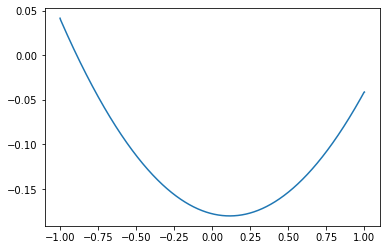

In [12]:
FIE2_Nystrom(k, f, l, a, b)